In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
training_data = pd.read_csv('dataset/flight-weather.csv')
training_data.shape

(32735, 32)

In [3]:
training_data.keys()

Index(['Unnamed: 0', 'HOURLYVISIBILITY', 'HOURLYWindSpeed', 'HOURLYPrecip',
       'HOURLYRelativeHumidity', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYStationPressure',
       'HOURLYSeaLevelPressure', 'HOURLYAltimeterSetting',
       'HOURLYWindDirectionSin', 'HOURLYWindDirectionCos',
       'HOURLYPressureTendencyIncr', 'HOURLYPressureTendencyDecr',
       'HOURLYPressureTendencyCons', 'year', 'month', 'day', 'dep_time',
       'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight',
       'origin', 'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [4]:
type(training_data['month'][0])

numpy.int64

In [5]:
training_data['month'][0]

6

In [6]:
print(training_data.size)

1047520


In [7]:
# number of dep delay over than 300 min
len(training_data['dep_delay'][training_data['dep_delay'] > 300])

57

In [8]:
# number of arr delay over than 300 min
len(training_data['arr_delay'][training_data['arr_delay'] > 300])

52

In [9]:
training_data['month'][training_data['month'] == 1]

5        1
15       1
21       1
24       1
45       1
        ..
32672    1
32696    1
32715    1
32718    1
32729    1
Name: month, Length: 2610, dtype: int64

In [10]:
training_data['month'][training_data['arr_delay'] < 0]

0         6
3         5
4         7
8         9
10        6
         ..
32725    12
32727    10
32730    10
32732     9
32734     3
Name: month, Length: 18724, dtype: int64

In [11]:
from collections import Counter
Counter(training_data['month'][training_data['arr_delay'] < 0])


Counter({6: 1437,
         5: 1734,
         7: 1403,
         9: 1981,
         11: 1660,
         10: 1876,
         8: 1679,
         2: 1253,
         12: 1145,
         1: 1423,
         3: 1678,
         4: 1455})

In [12]:
training_data.shape

(32735, 32)

In [13]:
for i in range(32735):
    if(i <= 0):
        training_data['dep_delay'][i] = 0;
    else:
        training_data['dep_delay'][i] = 1;

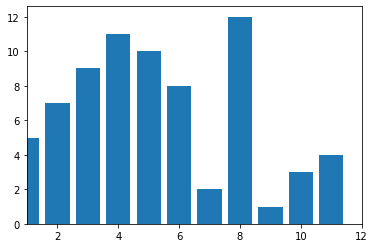

In [14]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
 
num_list = Counter(training_data['month'][training_data['arr_delay'] < 0])
plt.bar(range(len(num_list)), num_list)
plt.xlim(1, 12)
plt.show()

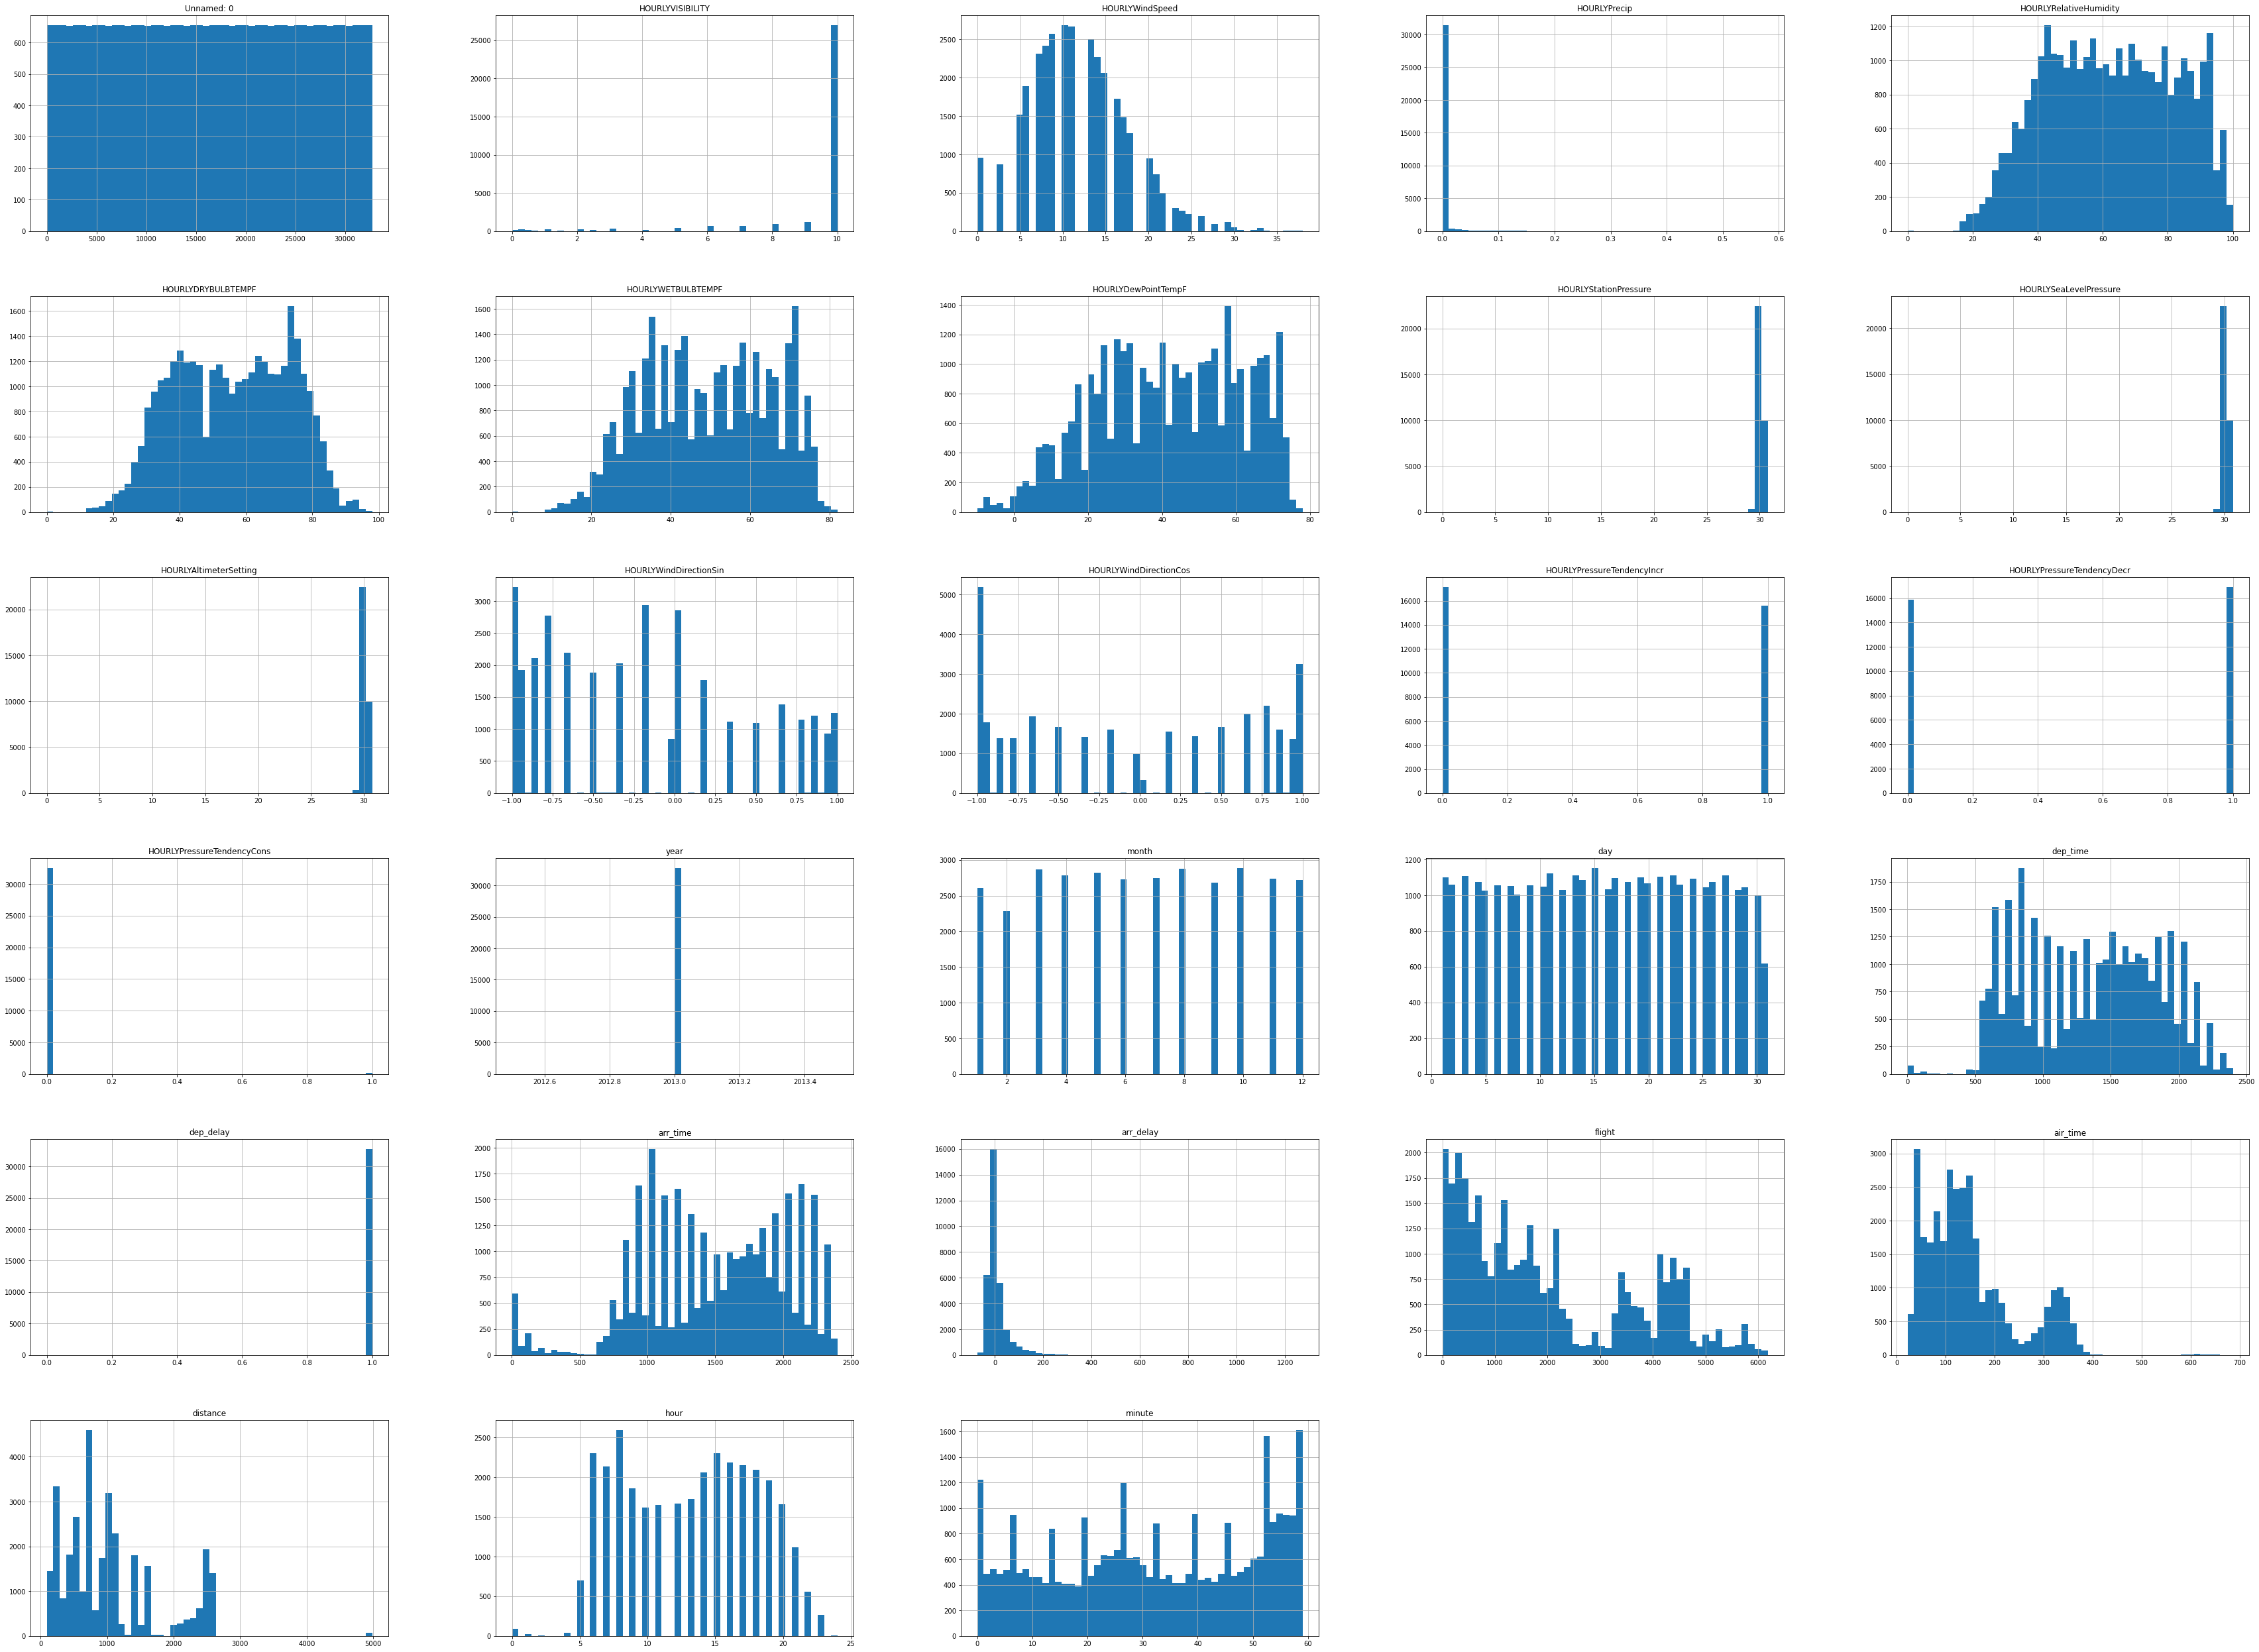

In [15]:
# 有所直方图
training_data.hist(bins=50,figsize=(60,45)) #bins总个数，figsize图的大小
plt.show()

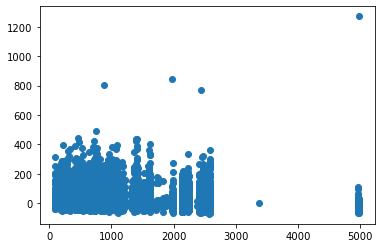

In [16]:
# distance - arrive delay
plt.scatter(training_data['distance'], training_data['arr_delay'])
plt.show()

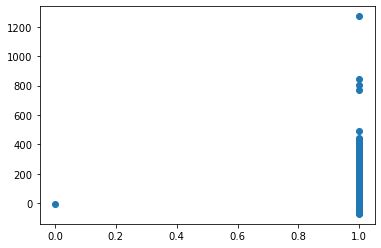

In [17]:
# 起飞延误-到达延误
plt.scatter(training_data['dep_delay'], training_data['arr_delay'])
plt.show()

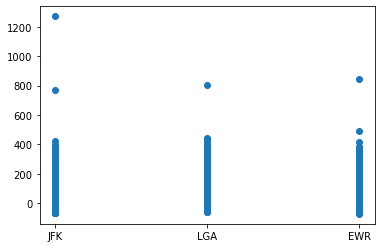

In [18]:
plt.scatter(training_data['origin'], training_data['arr_delay'])
plt.show()

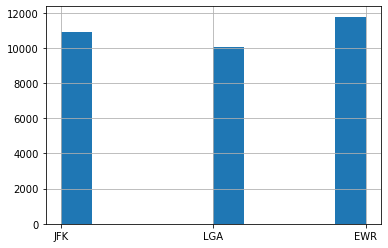

In [19]:
training_data['origin'].hist()
plt.show()

In [20]:
# ava Arrive delay
sum = 0
times = 0
for i in training_data['arr_delay']:
    sum += i;
    times +=1 ;
ava = sum/times
print('%fmin' %ava)

7.100810min


In [21]:
# ava depature delay

sum = 0
times = 0
for i in training_data['dep_delay']:
    sum += i;
    times +=1 ;
ava = sum/times
print('%fmin' %ava)

0.999969min


In [22]:
delay_data = pd.read_csv('dataset/flight-weather.csv')
ontime = 0
delay = 0
ahead = 0
delaysum = 0
aheadsum = 0
for i in delay_data['dep_delay']:
    if (i > 0):
        delay += 1
        delaysum += i
    elif(i < 0):
        ahead += 1
        aheadsum += i
    else:
        ontime += 1
    

print(f'{delay} flights are delay, avg delay time is {delaysum/delay} min.')
print(f'{ahead} flights are ahead, avg ahead time is {-(aheadsum/ahead)} min.')
print(f'{ontime} flight are ontime.')

12799 flights are delay, avg delay time is 39.50488319399953 min.
18309 flights are ahead, avg ahead time is 4.900322245889999 min.
1627 flight are ontime.


#### 给延误时间binning  ontime, ok, worried, annoying, angry

In [23]:

intime = 0
ok = 0
worried = 0
annoying = 0
angry = 0

for i in delay_data['dep_delay']:
    if(i <= 0):
        ontime+=1;
    elif(i <= 10):
        ok+=1;
    elif(i <= 30):
        worried +=1;
    elif(i <= 90):
        annoying +=1;
    else:
        angry+=1;

print(ontime)
print(ok)
print(worried)
print(annoying)
print(angry)


21563
4528
3428
3257
1586


In [24]:
training_data.corr()

,Unnamed: 0,HOURLYVISIBILITY,HOURLYWindSpeed,HOURLYPrecip,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYStationPressure,HOURLYSeaLevelPressure,...,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
Unnamed: 0,1.000000,-0.006182,0.008429,0.003897,0.002755,-0.003551,-0.002244,-0.001895,-0.000822,-0.000778,...,-0.003028,-0.007748,0.009573,-0.001342,-0.001189,-0.001754,0.000509,0.000331,-0.007756,0.000756
HOURLYVISIBILITY,-0.006182,1.000000,0.064598,-0.321002,-0.518631,0.034544,-0.077973,-0.180272,0.135697,0.135609,...,0.016538,0.078954,-0.002040,0.087262,-0.135516,0.015788,-0.018588,-0.009421,0.078056,0.018684
HOURLYWindSpeed,0.008429,0.064598,1.000000,0.028618,-0.268273,-0.129857,-0.180728,-0.234725,-0.114205,-0.114434,...,-0.005386,0.130635,0.005670,0.144654,0.044440,0.001368,0.011060,0.000714,0.130824,-0.014134
HOURLYPrecip,0.003897,-0.321002,0.028618,1.000000,0.217264,-0.003482,0.043788,0.084520,-0.075073,-0.075124,...,-0.022063,0.020475,0.000817,0.000566,0.091829,-0.011135,0.008807,0.004394,0.021006,-0.015689
HOURLYRelativeHumidity,0.002755,-0.518631,-0.268273,0.217264,1.000000,0.140063,0.365916,0.574527,-0.112292,-0.111819,...,-0.033906,-0.115897,-0.003916,-0.177005,0.162346,-0.037288,0.014427,0.018730,-0.114927,-0.018027
HOURLYDRYBULBTEMPF,-0.003551,0.034544,-0.129857,-0.003482,0.140063,1.000000,0.970049,0.886571,-0.107891,-0.106811,...,-0.001079,0.058111,-0.007775,0.052090,0.007704,0.006917,-0.036908,0.011973,0.058051,-0.002399
HOURLYWETBULBTEMPF,-0.002244,-0.077973,-0.180728,0.043788,0.365916,0.970049,1.000000,0.968536,-0.129941,-0.128835,...,-0.008436,0.028419,-0.008894,0.006661,0.046504,-0.001936,-0.032311,0.014985,0.028589,-0.006539
HOURLYDewPointTempF,-0.001895,-0.180272,-0.234725,0.084520,0.574527,0.886571,0.968536,1.000000,-0.149655,-0.148561,...,-0.014261,-0.009002,-0.008558,-0.041650,0.076005,-0.011492,-0.024449,0.018302,-0.008596,-0.010308
HOURLYStationPressure,-0.000822,0.135697,-0.114205,-0.075073,-0.112292,-0.107891,-0.129941,-0.149655,1.000000,0.999955,...,-0.001195,-0.056966,0.003405,-0.006835,-0.085151,0.013944,-0.010001,-0.010103,-0.057710,0.023944
HOURLYSeaLevelPressure,-0.000778,0.135609,-0.114434,-0.075124,-0.111819,-0.106811,-0.128835,-0.148561,0.999955,1.000000,...,-0.000976,-0.056902,0.003421,-0.006827,-0.085158,0.013912,-0.010000,-0.010063,-0.057646,0.023947


<AxesSubplot:>

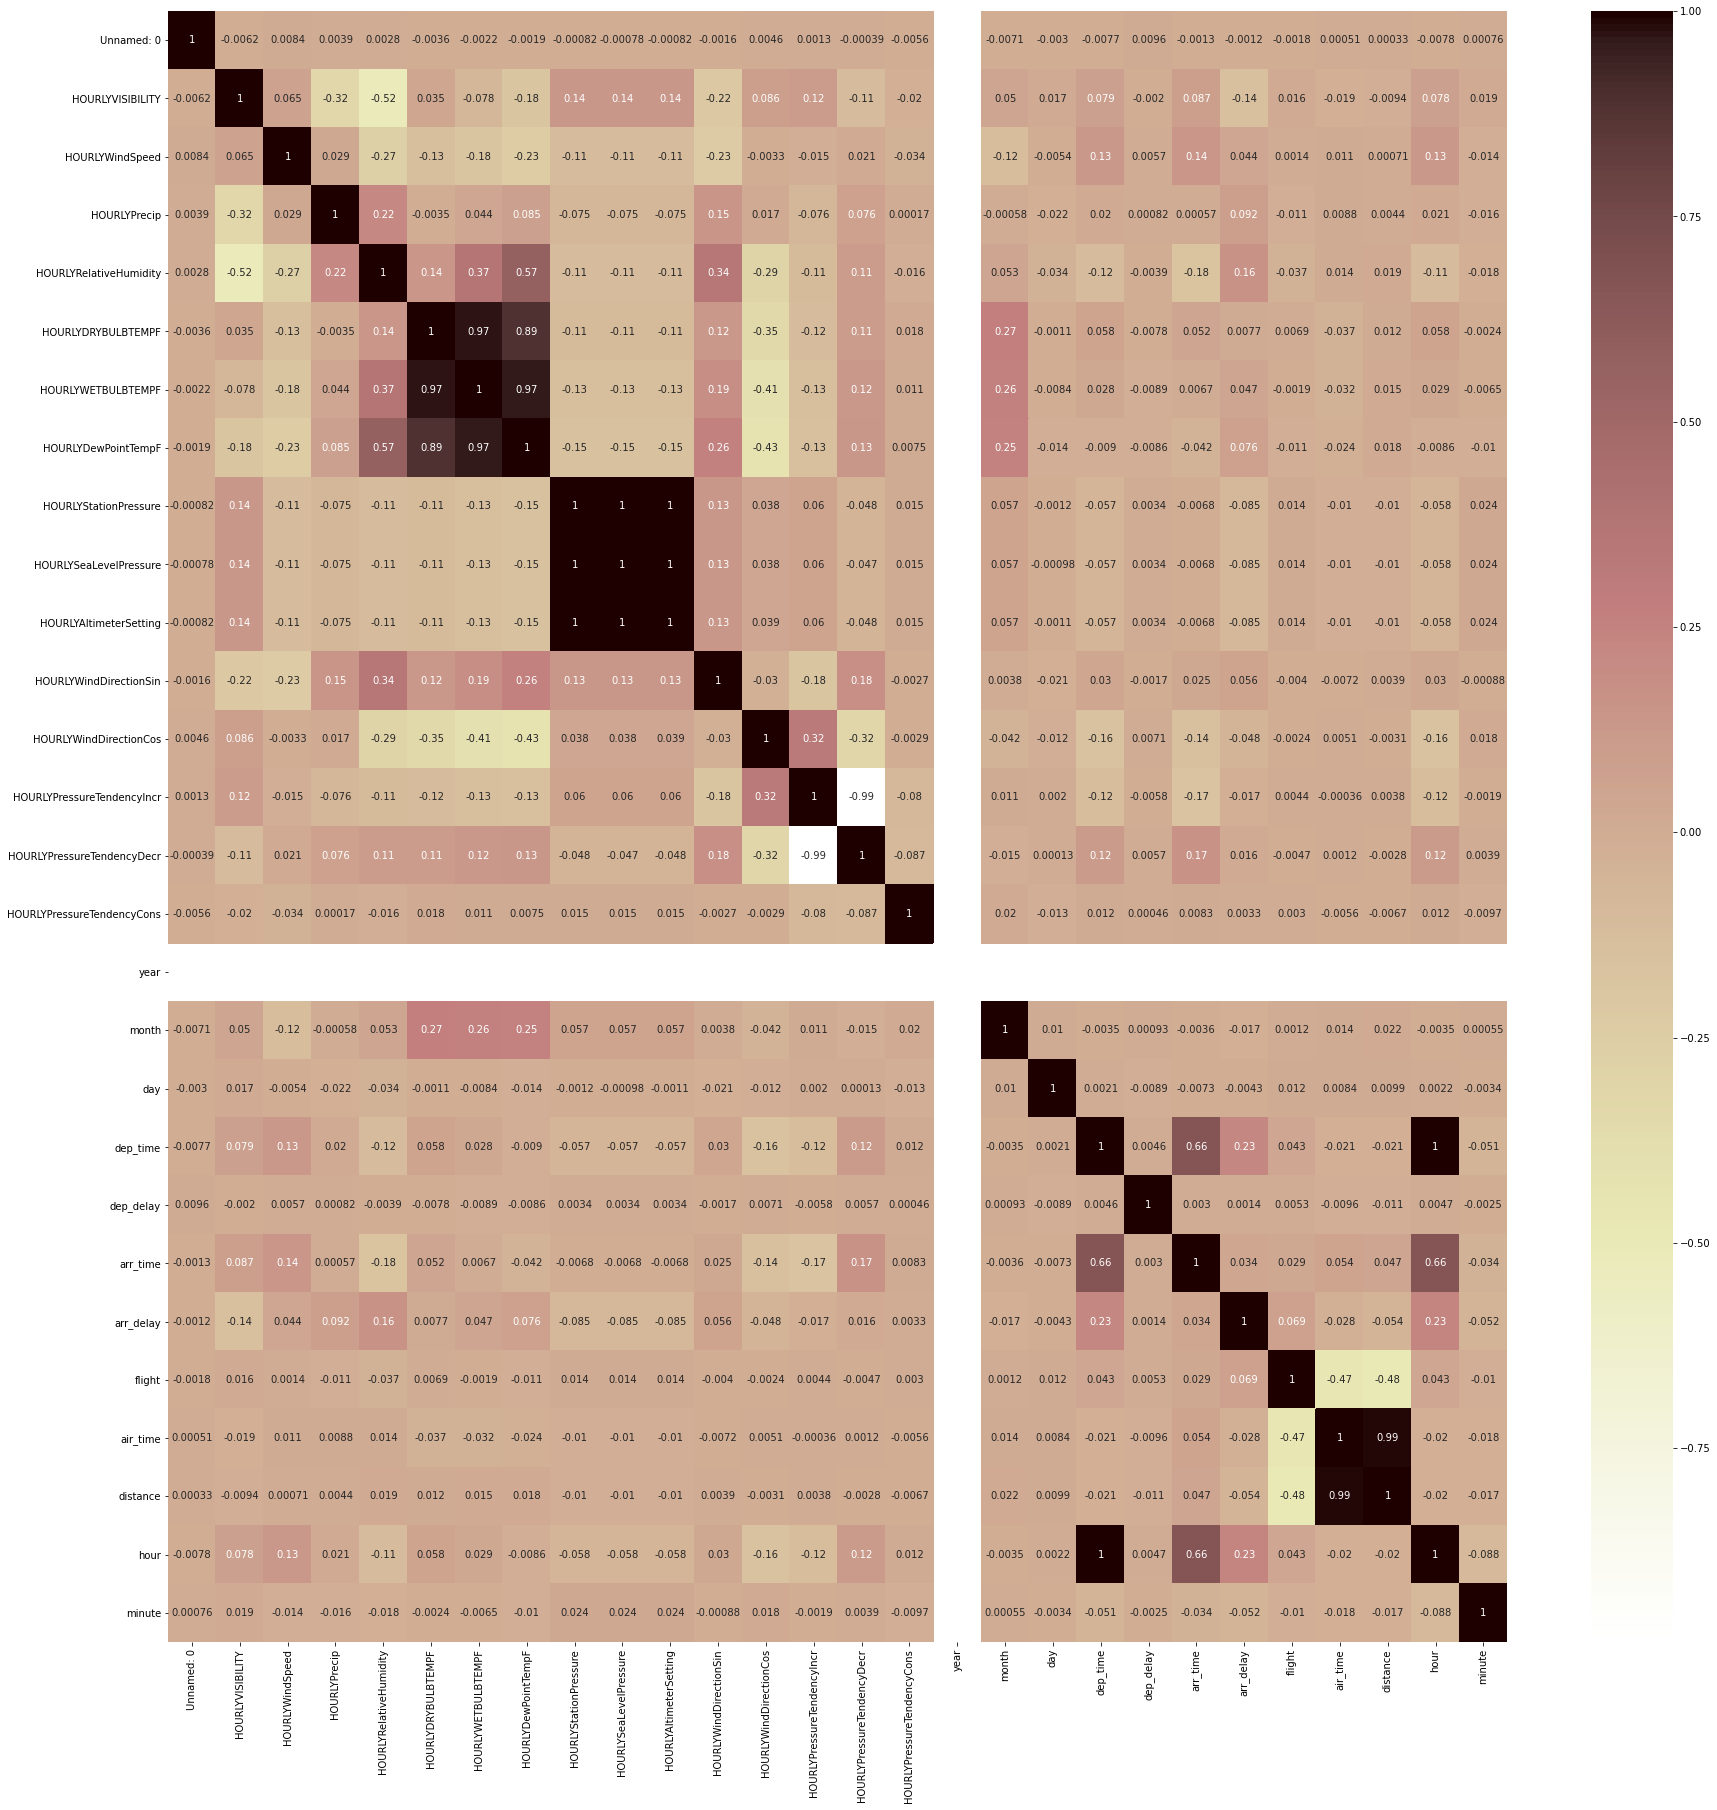

In [25]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(data = training_data.corr(), annot = True, cmap = 'pink_r')

<AxesSubplot:>

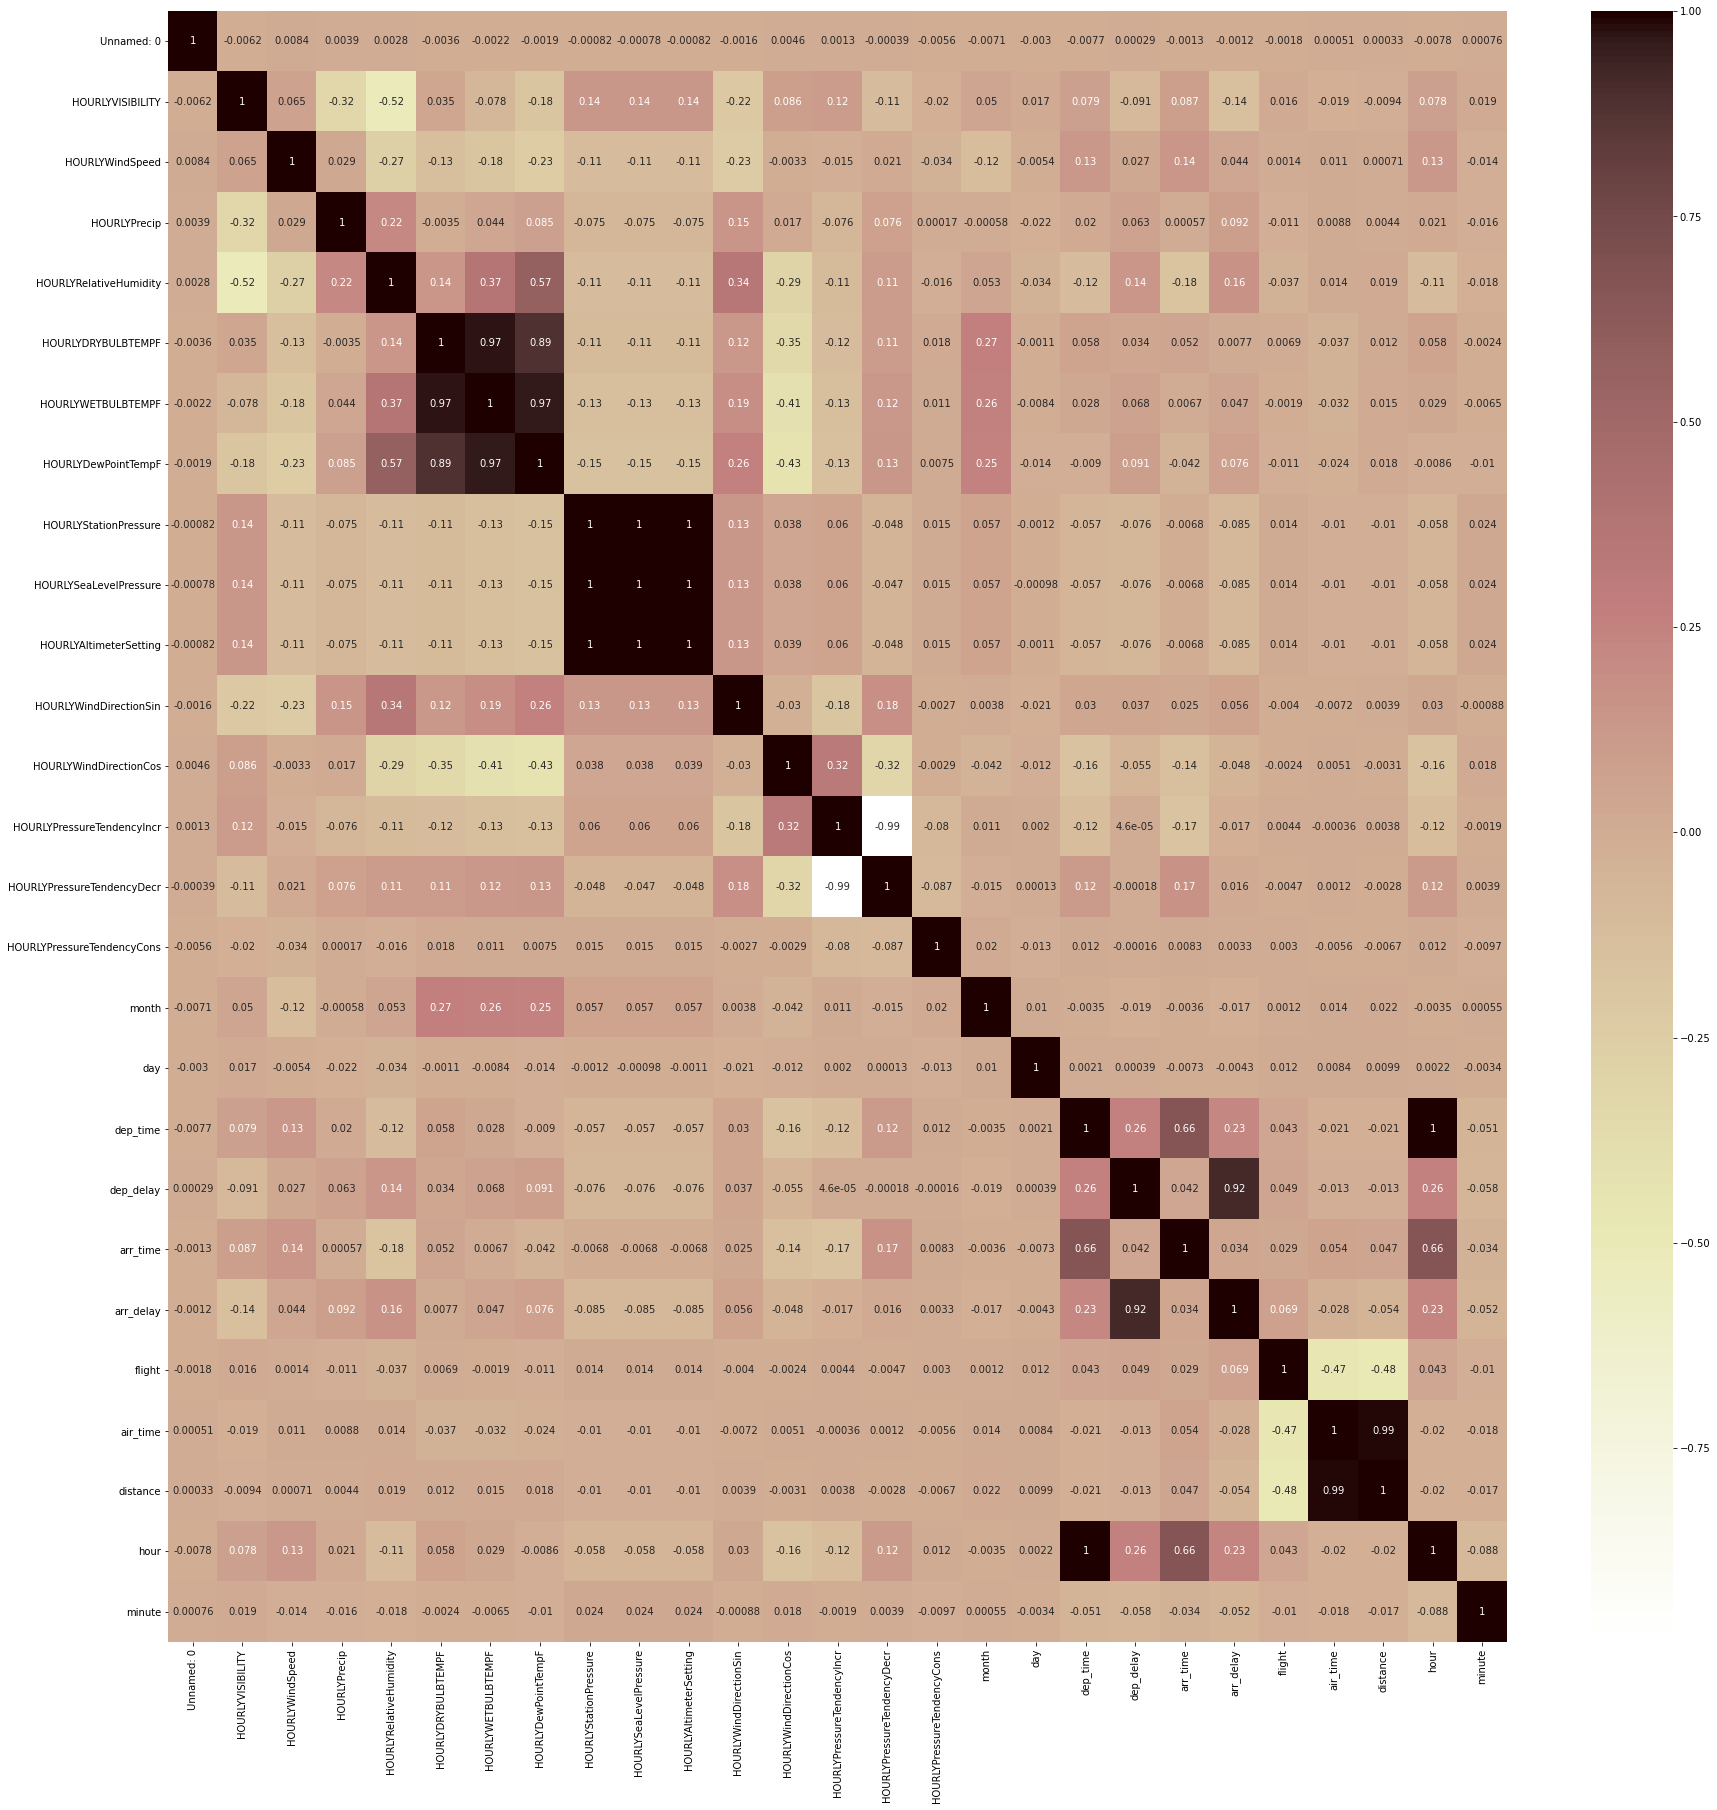

In [26]:
data = pd.read_csv('dataset/flight-weather.csv')
x=data.drop(['year'], axis = 1)
x.keys()
plt.figure(figsize=(30,30))
sns.heatmap(data = x.corr(), annot = True, cmap = 'pink_r')